# Bitcoin Price Prediction
## Team -10

- Josh Hill (hill.jos@northeastern.edu)
- Jingkai Wang (wang.jingkai@northeastern.edu)
- Lijun Zhang (zhang.liju@northeastern.edu)
- Victor Zheng (zheng.vic@northeastern.edu)

# Executive Summary

The objective of this project is to establish a relationship between Bitcoin's price changes and the daily sentiment about Bitcoin on Twitter based on Bitcoin related tweets. To establish this relationship, we utilized [Bitcoin's historical price data](#tweets_vs._price_visualization) and a dataset containing [Bitcoin related tweets](#dataset_2). This relationship also takes into consideration the count of retweets, likes, and replies on each tweet. Unfortunately, our machine learning methods [failed](#failed) to successfully predict changes in Bitcoin's price. We suggest that our models are unsuccessful because our [methods of attaining tweet sentiment](#sentiment_analysis) may be faulty, and because the [Bitcoin tweet dataset](#dataset_2) is [potentially incomplete](#incomplete).


# Ethical Considerations

[Studies](https://www.forbes.com/sites/georgecalhoun/2022/10/11/the-ethics-of-crypto-sorting-out-good-intentions-and-bad-actors/?sh=12382b075c49) indicate that cryptocurrency has some serious ethical issues such as enabling criminal activity and fraud. Bitcoin, as the largest cryptocurrency in the market, is what's usually traded to enable these activities as the transaction cannot be traced. It is also a common concern that cryptocurrency causes a lot of environmental damage, due to the [amount of energy required](https://www.cnet.com/personal-finance/crypto/bitcoin-mining-how-much-electricity-it-takes-and-why-people-are-worried/#:~:text=The%20Digiconomist's%20Bitcoin%20Energy%20Consumption,is%20close%20to%2012%20cents.) for transactions and mining to take place.

This tool is meant to provide insights on the fluctuations of cryptocurrencies and the impact of social media. However, it is not meant to act as tool to instruct users what to do with their money. There are limitations to how much impact tweets may have on Bitcoin prices, so this tool can only provide answers for a very small factor of the overall decision making that goes into investing. Furthermore, the tool is not meant to directly promote cryptocurrency trading and serves more as research on the blockchain.


# Introduction
Cryptocurrencies are not tied to physical assets, so changes in their prices are primarily driven by people's beliefs regarding their value and potential future value. People frequently use social media websites, especially Twitter, to talk in real-time about cryptocurrencies and their future prospects. Therefore, it may be possible to determine a relationship between Bitcoin sentiment on Twitter and fluctuations in Bitcoin's price. Using this relationship, crypto-investers could potentially predict and capitalize on changes in Bitcoin price if they have access to current Bitcoin tweet data. **This project aims to find a causal relationship between daily Bitcoin sentiment on Twitter and daily changes in Bitcoin's price.**


# Data Description

## Dataset 1: Cryptocurrency Historical Prices
 [Cryptocurrency Historical Prices](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory), consists of daily Bitcoin pricing information for the period of 04-29-2013 to 07-06-2021:

- High (highest price coin sold for the day)
- Low (lowest price coin sold for the day)
- Open (price a coin first trades with for that day)
- Closing (price a coin last trades with for that day)
- Volume (# of coins traded for that day)
- Marketcap (the total dollar-value of all the coins, aka price * total supply of bitcoins)
- Date

However, we will only use the `Open`, `Close`, `Volume`, `Date`, and `Marketcap` metrics.

## Data 

![bitcoin](https://i.ibb.co/0hSXXzY/2022-11-04-19-17-40.png)

[Kaggle Bitcoin Dataset](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory) 
![The data shows here](https://i.ibb.co/jz0xGb3/2022-11-04-18-10-48.png)

For the Bitcoin Data, we only need `Date`, `Open`, `Close`,`Volume` and `Marketcap` column, we use `df.drop()`to delete other data.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# access the data set from coin_Bitcoin.csv
df_btc_price = pd.read_csv('coin_Bitcoin.csv', index_col = None)

# Clean the dataset by dropping unnecessary columns, lowercase date
df_btc_price = df_btc_price.drop(['SNo', 'Name', 'Symbol', 'High', 'Low'], axis=1)
df_btc_price = df_btc_price.rename(columns = {'Date': 'date'})

# Remove time from Date column
df_btc_price['date'] = df_btc_price['date'].str.slice(0,10)

In [3]:
df_btc_price.head()

,date,Open,Close,Volume,Marketcap
0,2013-04-29,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02,116.379997,105.209999,0.0,1.168517e+09
4,2013-05-03,106.250000,97.750000,0.0,1.085995e+09


## Dataset 2: Kaggle Bitcoin Tweets Dataset
<a id='dataset_2'></a>
Our second dataset is [Kaggle Bitcoin Tweets - 16M Tweets](https://www.kaggle.com/datasets/alaix14/bitcoin-tweets-20160101-to-20190329). It has the following data for all tweets inlcuding "Bitcoin" or "BTC" for the period of 2007-04-19 to 2019-11-23:

- id (id of the tweet)
- user (twitter username of the author)
- fullname (fullname of the user)
- url (tweet URL, usually missing)
- timestamp (date and time of tweet)
- replies (number of replies to the tweet)
- likes (number of likes)
- retweets (number of retweets)
- text (text of the tweet)

![The data shows here](https://i.ibb.co/cL2cc81/Screenshot-2022-11-04-194347.png)

Due to this csv file being so massive, it's not possible to view it in standard programs such as Excel or Notepad. It also returns an unexpected number of values for some rows, meaning it cannot be loaded directly into a Pandas dataframe.

To solve this issue, we will read the file into a list instead, and delete the rows with irregular values. Then we will analyze each individual tweet's sentiment score and aggregate the data for each day in a new dataframe. We will also merge this dataframe with our Bitcoin Price dataframe, so that we can view daily price changes alongside daily tweet sentiment.

## % Change in BTC Price Per Day Visualization

In [4]:
# calculate the daily % change in Bitcoin's price
percent_price_change = 100 * (df_btc_price['Open'] - df_btc_price['Close']) / df_btc_price['Open']

([<matplotlib.axis.XTick at 0x1b3306d0790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

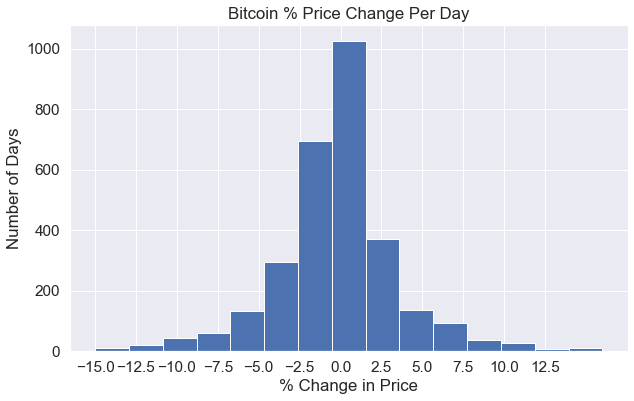

In [5]:
# create a histogram of bitcoin price change per day
# Set title, labels, xticks, and bins
sns.set(font_scale = 1.4)
bins = np.linspace(-15, 16, 16)
plt.hist(percent_price_change, bins)
plt.title('Bitcoin % Price Change Per Day')
plt.ylabel('Number of Days')
plt.xlabel('% Change in Price')
plt.gcf().set_size_inches(10, 6)

xticks = np.arange(-15, 15, step=2.5)
plt.xticks(xticks)

In [6]:
# calculate highest price increase
max_gain = percent_price_change.max()

# calculate highest price decrease
max_loss = percent_price_change.min()

print(f'Highest % increase: {max_gain}\nHighest % decrease: {max_loss}')

Highest % increase: 37.1868984110972
Highest % decrease: -41.681102054685205


The Normal Distribution above shows distribution of Bitcoin's price change per day. While Bitcoin is considered an extremely volatile currency, on the vast majority of days it actually experiences relatively minor fluctuations in price.

Certain extreme outliers are not shown on this graph. On its worst day, Bitcoin lost about 42% of its value, and on its best day, it gained 37% value. This is important to note, since an analysis of Bitcoin's price over a short time frame could yield inaccurate results due to the presence of an extreme outlier.

## Cleaning BTC Tweets Dataset

In [7]:
import csv
import tqdm as tqdm
import time
from collections import defaultdict

In [8]:
tweets = 'tweets.csv'

In [9]:
def read_file(filename):
    ''' Function: read_file
        Parameters: filename (string) for a CSV file
        Returns: 2d list of what the file contains, w/o the header
    '''
    data = []
    with open(filename, 'r', encoding = 'utf8') as infile:
        csvfile = csv.reader(infile, delimiter = ';')
        for row in (csvfile):
                data.append(row)
    return data

In [10]:
data = read_file(tweets)

In [11]:
data_test = data.copy()

In [12]:
# normal tweets have 9 associated values
# find total # of tweets with incorrect number of values
weird_values_total = []
for i in range(len(data)):
    if len(data[i]) != 9:
        weird_values_total.append(i)
        
len(weird_values_total)

801

801 values is insignificant given the scale of our dataset, so these can simply be removed.

In [13]:
weird_values = []
# get values of all weird_values
for i in range(len(data_test) - len(weird_values_total)):
    if len(data_test[i]) != 9:
        weird_values.append(data_test[i])

# check that correct # of values were found
assert(len(weird_values)) == len(weird_values_total)

# remove weird values from data_test
for value in weird_values:
    data_test.remove(value)
    
# check that correct # of values were removed
assert(len(data_test) == len(data) - len(weird_values))


In [14]:
# create default dict of {date: tweet_count}
tweet_date_dict = defaultdict(lambda: 0)
for tweet_indv in data_test:
    # get yyyy-mm-dd of tweet, +1 to dict value for each tweet on given day
    date = tweet_indv[4][:10]
    tweet_date_dict[date] += 1

# remove first "tweet" (header)
tweet_date_dict.pop('timestamp')

1

In [15]:
# sort tweets counts by day, create dataframe
tweet_date_dict = dict(sorted(tweet_date_dict.items()))
df_tweetdate = pd.DataFrame(tweet_date_dict.items(), index = None, columns = ['date', 'tweet_count'])

## Tweets vs. Price Visualization
<a id='tweets_vs._price_visualization'></a>

In [16]:
# combine df_tweetdate and df_btc_price on common dates
result = pd.merge(df_btc_price, df_tweetdate, how="inner")

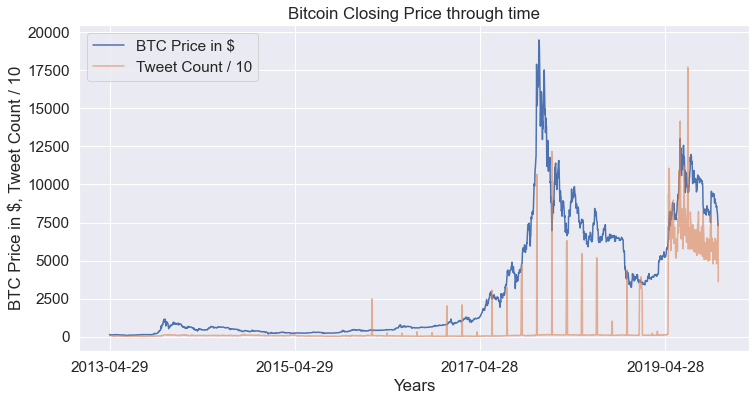

In [17]:
# Make a line plot to make it easier to see any trends of the Bitcoin Closing 
# prices.
plt.plot(result.loc[:, 'date'], result.loc[:, 'Close'], label = 'BTC Price in $')
plt.plot(result.loc[:, 'date'], result.loc[:, 'tweet_count']/10, label = 'Tweet Count / 10', alpha = .6)
# set the font size 
sns.set(font_scale=1.4)
# Set the title, labels, and size of the graph

xticks = []
for index in range(2400):
    if index % 730 == 0:
        xticks.append(df_btc_price.loc[index, 'date'])

# add title, labels, legend, xticks
plt.title('Bitcoin Closing Price through time')
plt.xlabel('Years')
plt.xticks(xticks)
plt.ylabel('BTC Price in $, Tweet Count / 10')
plt.gcf().set_size_inches(12, 6)
plt.legend()
plt.show()

<a id='incomplete'></a>
This graph demonstrates a historical correlation between the volume of Bitcoin related tweets and large fluctuations in Bitcoin's price, especially during 2019.

It also appears that the tweet dataset may contain issues/errors before 2019-05-10. The shape of the line graph appears highly irregular. It seems unlikely that there would be nearly 125,000 tweets in one day, and < 1000 just a day or two later. It further seems unlikely that this trend of a spike in tweets followed by a huge crash would completely disappear on 2019-05-10 and never resurface.

We have validated that the data was properly obtained from the CSV file, but we will proceed with caution when analyzing tweets before 2019-05-10.

## Sentiment Analysis of Tweet Data
<a id='sentiment_analysis'></a>
To analyze the sentiments of our tweets, we will use the NTLK VADER sentiment analysis tool. This is a powerful library specifically designed to be used on short form text such as social media posts, and has the ability to analyze slang/internet jargon.

Given text, it returns a postive sentiment value, a neutral sentiment value, a negative sentiment value, and a compound sentiment value. For our analysis, we will check whether the compound sentiment value is positive, negative, or neutral, and assign the tweet this categorical sentiment variable, along with all of its likes, retweets, and replies.

Using dictionaries, we will track the count of each of these tweet attributes for every day in the data. We will then build a dataframe which includes the count of all positive, negative, and neutral sentiment tweet attributes, along with the total counts of tweets.

The dataframe will also include the % change in price for each day and the following day, so that we can perform regressions on the immediate effect of tweets on Bitcoin's price, and the slightly delayed effect (which would be more useful to investors).

In [18]:
# Create empty dict with dates as keys to create all other dictionaries
empty_tweet_dict = tweet_date_dict.copy()

for key in empty_tweet_dict:
    empty_tweet_dict[key] = 0


In [19]:
# create positive tweet data dicts
pos_count_dict = empty_tweet_dict.copy()
pos_reply_dict = empty_tweet_dict.copy()
pos_retweet_dict = empty_tweet_dict.copy()
pos_like_dict = empty_tweet_dict.copy()

In [20]:
# create negative tweet data dicts
neg_count_dict = empty_tweet_dict.copy()
neg_reply_dict = empty_tweet_dict.copy()
neg_retweet_dict = empty_tweet_dict.copy()
neg_like_dict = empty_tweet_dict.copy()

In [21]:
# create neutral tweet data dicts
neutral_count_dict = empty_tweet_dict.copy()
neutral_reply_dict = empty_tweet_dict.copy()
neutral_retweet_dict = empty_tweet_dict.copy()
neutral_like_dict = empty_tweet_dict.copy()

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
import nltk

nltk.download(['vader_lexicon'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joshg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:
# dictionary of tweet info: key is "id" of the tweet (meaningless but unique)
# values of dict are lists. Items of dict in order are: date, replies, likes, retweets, text
complete_tweet_dict = defaultdict(lambda: [])
id = 0
for tweet_indv in data_test[1:]:
    date = tweet_indv[4][:10]
    replies = int(tweet_indv[5])
    likes = int(tweet_indv[6])
    retweets = int(tweet_indv[7])
    text = tweet_indv[8]
    
    # intitalize date to dict
    for aspect in [date, replies, likes, retweets, text]:
        complete_tweet_dict[id].append(aspect)
    id += 1
    

In [26]:
from nltk import tokenize

In [27]:
from tqdm import tqdm
import time

In [28]:
def get_sentiment_counts(tweets):
    """ gets the sentiments of all tweets on a given date, including like count,
        retweet count, and reply count for positive, negative, and neutral tweets
    
    Args:
        tweets (dict): dict of tweets, key is id and value is all tweet info (date, replies, likes, retweets, text)
        
    Returns: sentiment_day_dict (list): list items are tuples
        first tuple contains dicts of positive tweet info: pos tweet count, replies, likes, retweets
        second tuple is contains dicts of negative tweet info
        third tuple contains dicts of neutral tweet info
    """
    # initialize all dictionaries
    
    # Create empty dict with dates as keys to create all other dictionaries
    empty_tweet_dict = tweet_date_dict.copy()
    for key in empty_tweet_dict:
        empty_tweet_dict[key] = 0
    
    # create positive tweet data dicts
    pos_count_dict = empty_tweet_dict.copy()
    pos_reply_dict = empty_tweet_dict.copy()
    pos_retweet_dict = empty_tweet_dict.copy()
    pos_like_dict = empty_tweet_dict.copy()
    
    # create negative tweet data dicts
    neg_count_dict = empty_tweet_dict.copy()
    neg_reply_dict = empty_tweet_dict.copy()
    neg_retweet_dict = empty_tweet_dict.copy()
    neg_like_dict = empty_tweet_dict.copy()
    
    # create neutral tweet data dicts
    neutral_count_dict = empty_tweet_dict.copy()
    neutral_reply_dict = empty_tweet_dict.copy()
    neutral_retweet_dict = empty_tweet_dict.copy()
    neutral_like_dict = empty_tweet_dict.copy()
    
    sid = SentimentIntensityAnalyzer()
    
    # iterate through all tweets, make lowercase, get date and text
    for tweet in tqdm(tweets):
        date = tweet[0]
        text = tweet[-1].lower()

        # get compounds sentiment value, add tweet attributes to appropriate dictionary
        ss = sid.polarity_scores(text)
        for k in sorted(ss):
            analysis = (ss)
            
            # add to positive dict
            if analysis['compound'] > 0:
                pos_count_dict[date] += 1
                pos_reply_dict[date] += tweet[1]
                pos_like_dict[date] += tweet[2]
                pos_retweet_dict[date] += tweet[3]
            
            # add to negative dict
            elif analysis['compound'] < 0:
                neg_count_dict[date] += 1
                neg_reply_dict[date] += tweet[1]
                neg_like_dict[date] += tweet[2]
                neg_retweet_dict[date] += tweet[3]
            
            # add to neutral dict
            elif analysis['compound'] == 0:
                neutral_count_dict[date] += 1
                neutral_reply_dict[date] += tweet[1]
                neutral_like_dict[date] += tweet[2]
                neutral_retweet_dict[date] += tweet[3]
    
    return [(pos_count_dict, pos_reply_dict, pos_like_dict, pos_retweet_dict),
            (neg_count_dict, neg_reply_dict, neg_like_dict, neg_retweet_dict),
            (neutral_count_dict, neutral_reply_dict, neutral_like_dict, neutral_retweet_dict)]

In [29]:
# retrieve all dictionaries
all_data_dicts_final = get_sentiment_counts(complete_tweet_dict.values())

100%|████████████████████████████████████████████████████████████████████| 16889765/16889765 [50:31<00:00, 5570.88it/s]


In [30]:
# copy list of dictionaries
dictionary_list_test = all_data_dicts_final.copy()

In [31]:
# unpack list of dictionaries
pos_count_dict = dictionary_list_test[0][0]
pos_reply_dict = dictionary_list_test[0][1]
pos_like_dict = dictionary_list_test[0][2]
pos_retweet_dict = dictionary_list_test[0][3]

neg_count_dict = dictionary_list_test[1][0]
neg_reply_dict = dictionary_list_test[1][1]
neg_like_dict = dictionary_list_test[1][2]
neg_retweet_dict = dictionary_list_test[1][3]

neutral_count_dict = dictionary_list_test[2][0]
neutral_reply_dict = dictionary_list_test[2][1]
neutral_like_dict = dictionary_list_test[2][2]
neutral_retweet_dict = dictionary_list_test[2][3]

In [32]:
# create dataframe of every dictionary
df_pos_count = pd.DataFrame(pos_count_dict.items(), index = None, columns = ['date', 'pos_count'])
df_pos_reply = pd.DataFrame(pos_reply_dict.items(), index = None, columns = ['date', 'pos_reply'])
df_pos_like = pd.DataFrame(pos_like_dict.items(), index = None, columns = ['date', 'pos_like'])
df_pos_retweet = pd.DataFrame(pos_retweet_dict.items(), index = None, columns = ['date', 'pos_retweet'])

df_neg_count = pd.DataFrame(neg_count_dict.items(), index = None, columns = ['date', 'neg_count'])
df_neg_reply = pd.DataFrame(neg_reply_dict.items(), index = None, columns = ['date', 'neg_reply'])
df_neg_like = pd.DataFrame(neg_like_dict.items(), index = None, columns = ['date', 'neg_like'])
df_neg_retweet = pd.DataFrame(neg_retweet_dict.items(), index = None, columns = ['date', 'neg_retweet'])

df_neutral_count = pd.DataFrame(neutral_count_dict.items(), index = None, columns = ['date', 'neutral_count'])
df_neutral_reply = pd.DataFrame(neutral_reply_dict.items(), index = None, columns = ['date', 'neutral_reply'])
df_neutral_like = pd.DataFrame(neutral_like_dict.items(), index = None, columns = ['date', 'neutral_like'])
df_neutral_retweet = pd.DataFrame(neutral_retweet_dict.items(), index = None, columns = ['date', 'neutral_retweet'])

In [33]:
# create list of dfs, don't include pos_count
df_list = [df_pos_reply, df_pos_like, df_pos_retweet,
           df_neg_count, df_neg_reply, df_neg_like, df_neg_retweet,
           df_neutral_count, df_neutral_reply, df_neutral_like, df_neutral_retweet]

# merge dataframes
df_final = df_pos_count.copy()
for df in df_list:
    df_final = df_final.merge(df, on='date')
    
df_final

,date,pos_count,pos_reply,pos_like,pos_retweet,neg_count,neg_reply,neg_like,neg_retweet,neutral_count,neutral_reply,neutral_like,neutral_retweet
0,2007-04-19,4,0,0,8,0,0,0,0,0,0,0,0
1,2009-01-11,0,0,0,0,0,0,0,0,4,3160,57880,22168
2,2009-01-21,0,0,0,0,0,0,0,0,4,220,6176,1568
3,2009-01-27,0,0,0,0,0,0,0,0,4,176,4168,1108
4,2009-01-29,0,0,0,0,0,0,0,0,4,0,112,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2019-11-19,84408,37944,207284,105416,31196,9300,93504,27524,136384,12352,250956,50080
3001,2019-11-20,86060,46500,234568,93696,28584,10212,87080,25424,132548,17928,184552,96296
3002,2019-11-21,94112,51972,225932,89816,36716,16776,470748,108560,148008,20604,218556,101616
3003,2019-11-22,93792,38336,207696,71576,43436,17760,150736,33340,162460,23296,210400,68272


In [34]:
# prepare Bitcoin price dataset for merging
df_btc_price = df_btc_price.rename(str.lower, axis='columns')

# create new df to track % price change
df_btc_price_change = df_btc_price.copy()

# get % price change for each day
percent_price_change = (((df_btc_price_change.loc[:, 'open'] - df_btc_price_change.loc[:, 'close'])
                          / df_btc_price_change.loc[:, 'open']) * 100)

# add % price change to df
df_btc_price_change['percent_price_change'] = percent_price_change

# add % price change for next day to df
percent_price_change_next_day = percent_price_change[1:]
df_btc_price_change['percent_price_change_next_day'] = percent_price_change_next_day
df_btc_price_change['percent_price_change_next_day'] = df_btc_price_change['percent_price_change'].shift(periods = -1)

In [35]:
# merge dataframes
df_complete = pd.merge(df_final, df_btc_price_change, how="inner", on='date')
df_complete = df_complete.drop(['open', 'close'], axis = 1)

In [36]:
df_complete

,date,pos_count,pos_reply,pos_like,pos_retweet,neg_count,neg_reply,neg_like,neg_retweet,neutral_count,neutral_reply,neutral_like,neutral_retweet,volume,marketcap,percent_price_change,percent_price_change_next_day
0,2013-04-29,1224,0,0,168,0,0,0,0,1360,0,4,84,0.000000e+00,1.603769e+09,-7.509441,3.472222
1,2013-04-30,1400,0,20,328,208,0,16,40,1196,12,20,148,0.000000e+00,1.542813e+09,3.472222,15.834534
2,2013-05-01,2212,0,4,436,232,0,16,44,1020,0,28,180,0.000000e+00,1.298955e+09,15.834534,9.597868
3,2013-05-02,1572,0,16,200,268,0,16,60,904,0,28,140,0.000000e+00,1.168517e+09,9.597868,8.000000
4,2013-05-03,1692,4,0,1460,268,0,4,52,808,0,8,96,0.000000e+00,1.085995e+09,8.000000,-14.678901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2019-11-19,84408,37944,207284,105416,31196,9300,93504,27524,136384,12352,250956,50080,2.108361e+10,1.481784e+11,1.191894,2.149601
2396,2019-11-20,86060,46500,234568,93696,28584,10212,87080,25424,132548,17928,184552,96296,2.076430e+10,1.449627e+11,2.149601,4.747154
2397,2019-11-21,94112,51972,225932,89816,36716,16776,470748,108560,148008,20604,218556,101616,2.251424e+10,1.380319e+11,4.747154,4.539657
2398,2019-11-22,93792,38336,207696,71576,43436,17760,150736,33340,162460,23296,210400,68272,3.424232e+10,1.317918e+11,4.539657,-1.392956


# Method:

## 1 - Cross Validated Linear Regressions

We will create cross validated linear regressions to find the impact of tweet sentiment metrics on Bitcoin's price for each day. Ideally this will yield a positive R^2 value for a linear regression equation which allows us to predict the % change in Bitcoin's price, based on the tweet sentiment values for that day.

We will also run this regression on the % change in Bitcoin's price for the next day. If successful, this would allow investors to potentially predict and take advantage of future Bitcoin price changes from current tweet data.

In creating this regression, we making multiple assumptions:
- Twitter activity and overall sentiment impacts Bitcoin's price


- Our sentiment analysis accurately analyzed the sentiment of the tweets, and appropriately takes into account tweet attributes such as likes, retweets, and replies.


We will also run regressions of total tweets vs. change in Bitcoin price. If our sentiment analysis or sentiment aggregation method is inaccurate, we may be able to achieve a better R^2 by using this more simple metric.

Finally, we will address the issue that appeared in our graph of total tweets vs. Bitcoin price, where the graph of total tweets appeared irregular before 2019-05-10. To do this, we will re-run all of our regressions on 2019-05-10 onwards. Another potential pitful we run into with this analysis is cross validation: there are only around 200 rows in this smaller segment of the data, so by cross validating multiple times, we create regressions on very small sample sizes. This may could yield highly inaccurate results.

#### Regressions on all dates:
1. y = percent_price_change | x = all sentiment columns


2. y = percent_price_change_next_ day | x = all sentiment columns


3. y = percent_price_change | x = total_tweets


4. y = percent_price_change_next_day | x = total_tweets

#### Regressions on  2019-05-10 onwards:
5. y = percent_price_change | x = all sentiment columns


6. y = percent_price_change_next_ day | x = all sentiment columns


7. y = percent_price_change | x = total_tweets


8. y = percent_price_change_next_day | x = total_tweets


## 2 - Decision Tree Regressor

We will create a decision tree regressor to predict the % change in Bitcoin's price on a given day based on aggregated sentiment counts on that day. This will also allow us to see which sentiment variables may be most significant (e.g., positive tweet likes).

One potential pitfall of this approach is that our completed tree may not be able to give accurate/useful predictions due to the nature of our data.

As we saw in our histogram of Bitcoin's % change in price per day, Bitcoin is not very volatile on the majority of days. On a few days, however, it will have a huge swing in price. These values will contribute significantly to MSE values, and the decision tree may end up with several very small sample size "buckets" to account for these outliers. Then, the remaining buckets will have large sample sizes with low predicted values for % change in price, since the remaining data points will all be relatively close to 0.

## 3 - Random Forest Regressor, Feature Importance Graph

We will create a random forest regressor to reduce potential overfitting of our model, and to create a feature importance plot. The feature importance plot will tell us which tweet sentiment variables are the most important in determining % change in Bitcoin's price.

One potential downfall of this ML method is that if our regressor does not perform well, then our feature importance graph will also be relatively useless. Our feature importance graph is only relevant if our regressor actually does a good job of predicting change in Bitcoin price.

## 4 - K-Means Clustering Comparison of Tweet Data and BTC Price

We will create two graphs of k-means clusters vs. mean distance squared to centroid. One k means graph will relate to our aggregated tweet attribute data, and the other graph will relate to Bitcoin's price data. If the graphs seem to have the same/similar ideal k number of clusters, this suggests that there is at least some correlation between Bitcoin's price fluctuations and Twitter sentiment.

One drawback of this ML method is that any implications it provides will be somewhat subjective and non-concrete. It's possible that our two datasets could have the same ideal number of k-means but still not be related to one another. This method of analysis will serve as more of an indicator of whether or not further future inquiry is warranted. We can take it into account with the rest of our analysis, but it should not be used as a concrete indicator.

# Results

## 1 - Cross Validated Linear Regressions

In [37]:
# copy complete df, add total tweets column
df = df_complete.copy()
df['total_tweet_count'] = df['pos_count'] + df['neg_count'] + df['neutral_count']

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
import pandas as pd
def linear_regression(x, y, pr=0):
    """ creates a 10 fold cross validated linear regression
    
    Args:
        x (dataframe): pandas dataframe with only x variable columns
        y (pandas series): dependant regression variable, such as df['price_change']
        pr (int): if 0, does not print regression equation. If 1, prints equation.
        
    
    Returns:
        mean r^2 of all linear regressions, prints mean regression equation
    """
        
    lin = LinearRegression()

    # 10-fold cross-validation
    cv_results = cross_validate(lin, x, y, cv=10, scoring=('r2'), return_estimator=True)

    # Compute the mean R^2 score from the cross-validation
    mean_r2 = cv_results['test_score'].mean()

    # Get the list of linear regression estimators from the cross-validation results
    estimators = cv_results['estimator']

    # Compute the mean coefficients and intercepts of the linear regression models
    mean_coef = np.mean([model.coef_ for model in estimators], axis=0)
    mean_intercept = np.mean([model.intercept_ for model in estimators])

    # Print the mean regression equation
    equation = "y = "
    for i in range(len(x.columns)):
        part = "(" + str(round(mean_coef[i], 10)) + "*" + x.columns[i] + ") + "
        equation += part
    equation += str(round(mean_intercept, 5))
    if pr == True:
        print(equation + "\n")

    # Return the mean R^2 score
    return mean_r2


In [39]:
df_test = df.copy()

In [40]:
df_all_x_attributes = df_test.drop(['volume', 'marketcap', 'percent_price_change',
                                 'percent_price_change_next_day', 'total_tweet_count', 'date'], axis = 1)

#### 1. y = percent_price_change | x = all sentiment columns | dates = all

In [41]:
# print equation and r^2 for first regression to demonstrate ability of function
# print only r^2 value for future regressions
reg_list = []
reg1 = linear_regression(df_all_x_attributes, df['percent_price_change'], 0)
linear_regression(df_all_x_attributes, df['percent_price_change'], 1)

y = (1.9096e-06*pos_count) + (3.48192e-05*pos_reply) + (2.0809e-06*pos_like) + (-2.74834e-05*pos_retweet) + (0.0001778646*neg_count) + (-2.64452e-05*neg_reply) + (5.8774e-06*neg_like) + (-2.6019e-06*neg_retweet) + (-2.51494e-05*neutral_count) + (-4.5712e-05*neutral_reply) + (-1.10046e-05*neutral_like) + (1.69547e-05*neutral_retweet) + -0.1662



-0.14620712996801943

#### 2. y = percent_price_change_next_day | x = all sentiment columns | dates = all

In [42]:
reg2 = linear_regression(df_all_x_attributes, df['percent_price_change_next_day'])
print(reg2)

-0.10375319506256293


In [43]:
# create dataframe including only total tweets
drop_list = list(df_test.columns[:-1])
df_total_tweets = df_test.drop(drop_list, axis = 1)

#### 3. y = percent_price_change | x = total_tweets | dates = all

In [44]:
reg3 = linear_regression(df_total_tweets, df['percent_price_change'])
print(reg3)

-0.014470103961547909


#### 4. y = percent_price_change_next_day | x = total_tweets | dates = all

In [45]:
reg4 = linear_regression(df_total_tweets, df['percent_price_change_next_day'])
print(reg4)

-0.013027582844046148


In [46]:
df_test.loc[df['date'] == '2019-05-10']

,date,pos_count,pos_reply,pos_like,pos_retweet,neg_count,neg_reply,neg_like,neg_retweet,neutral_count,neutral_reply,neutral_like,neutral_retweet,volume,marketcap,percent_price_change,percent_price_change_next_day,total_tweet_count
2202,2019-05-10,67292,53664,344956,119240,25736,17648,156668,38948,106428,25072,266300,124144,1.941988e+10,1.128633e+11,-3.287436,-12.933352,199456


In [47]:
df_later = df_test.iloc[2202:]
df_later = df_later.drop(['volume', 'marketcap', 'percent_price_change',
                                      'percent_price_change_next_day', 'total_tweet_count', 'date'], axis = 1)

#### 5. y = percent_price_change | x = all sentiment columns | dates = 2019-05-10 onwards

In [48]:
reg5 = linear_regression(df_later, df.iloc[2202:]['percent_price_change'])
print(reg5)

-0.4734970478369114


#### 6. y = percent_price_change_next_day | x = all sentiment columns | dates = 2019-05-10 onwards

In [49]:
reg6 = linear_regression(df_later, df.iloc[2202:]['percent_price_change_next_day'])
print(reg6)

-5.513333442606273


#### 7. y = percent_price_change | x = total_tweets | dates = 2019-05-10 onwards

In [50]:
df_total_tweets_later = df_total_tweets.iloc[2202:]

reg7 = linear_regression(df_total_tweets_later, df.iloc[2202:]['percent_price_change'])
print(reg7)

-0.13022507965791305


#### 8. y = percent_price_change_next_day | x = total_tweets | dates = 2019-05-10 onwards

In [51]:
reg8 = linear_regression(df_total_tweets_later, df.iloc[2202:]['percent_price_change_next_day'])
print(reg8)

-0.1597731986071157


<a id='failed'></a>
None of the r^2 values for our regressions are greater than 0, meaning they are not better than random chance at predicting changes in Bitcoin price. However, a couple regressions (reg3 and reg4) did get very close to an R^2 of 0.

## 2 - Decision Tree Regressor

In [52]:
# copy complete df, set index to 'date' column, drop unnecessary columns
df_tweet = df_complete.copy()
df_tweet = df_tweet.set_index('date')
df_tweet = df_tweet.drop(['volume', 'marketcap'], axis = 1)

In [53]:
from sklearn import tree

def train_dec_tree_tweet(df, max_depth=3, x_feat_list=None, plot=True):
    """ trains a decision tree classifier, optionally prints graph
    
    Args:
        df_tweet (pd.DataFrame): the tweet for bitcoin
        max_depth (int): max depth of decision tree
        x_feat_list (list): list of input features
        plot (bool): toggles graph output (default: True)
        
    Returns:
        dec_tree_reg (DecisionTreeRegressor): trained decicision tree
    """
    
    if x_feat_list is None:
        # default x_feat_list
        x_feat_list = df.columns[1: -2]

    # extract data from dataframe
    x = df.loc[:, x_feat_list].values
    y = df.loc[:, 'percent_price_change'].values
    
    # build decision tree classifier
    dec_tree_reg = tree.DecisionTreeRegressor(max_depth=max_depth)

    # fit data
    dec_tree_reg = dec_tree_reg.fit(x, y)
    
    # plot figure of decision tree
    if plot:
        # initialize empty figure (plot_tree sets text size to fill given figure
        # if we resize figure afterwards text size remains too small)
        plt.figure()
        plt.gcf().set_size_inches(20, 15)
        
        # 'plot' decision tree
        tree.plot_tree(dec_tree_reg, 
                       feature_names=x_feat_list)
    
    return dec_tree_reg

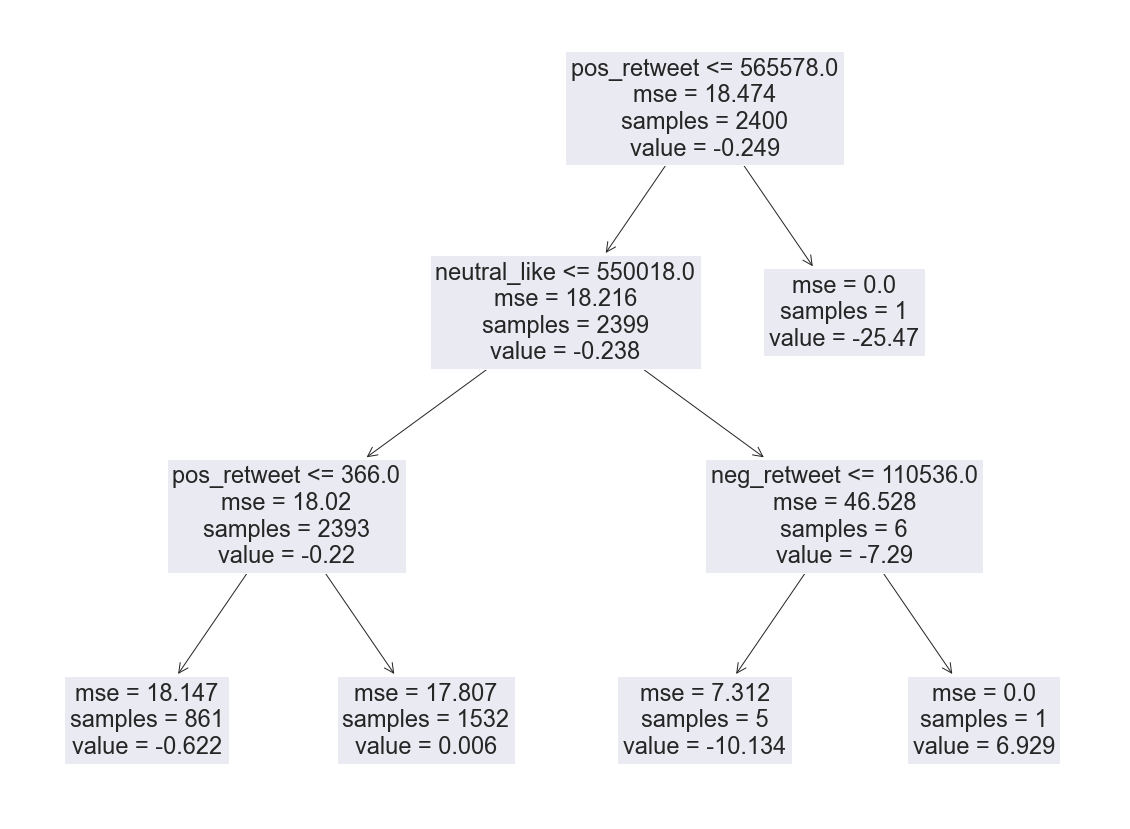

In [54]:
dec_tree = train_dec_tree_tweet(df_tweet, max_depth=3, plot=True)

Our decision tree regressor significantly reduces MSE for only 7 samples out of 2400. It is therefore not a useful tool for deriving % change in Bitcoin price from Bitcoin tweet attribute sentiments.

## 3 - Random Forest Regressor, Feature Importance Graph

In [55]:
from sklearn.ensemble import RandomForestRegressor

x_feat_list = df_tweet.columns[1: -2]

# extract data from dataframe
x = df_tweet.loc[:, x_feat_list].values
y = df_tweet.loc[:, 'percent_price_change'].values

rf_reg = RandomForestRegressor(n_estimators=100)

rf_reg.fit(x, y)



RandomForestRegressor()

In [56]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in MSE across all Decision Trees)')

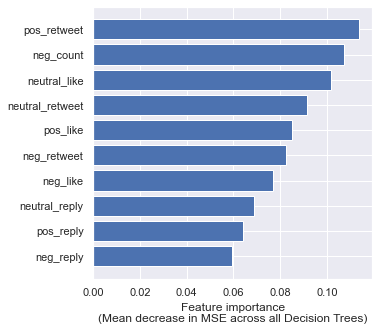

In [57]:
sns.set()

plot_feat_import(x_feat_list, rf_reg.feature_importances_, limit=10)

Based on the efficacy of our previous ML models, it is unlikely that our random forest regressor is accurate. Therefore, this feature importance graph is not very relevant, since it is derived from said random forest regressor.

## 4 - K-Means Clustering Comparison of Tweet Data and BTC Price

#### Tweets data

In [58]:
from copy import copy
# load data
x_feat_list = df_tweet.columns[1:-2].values
df_x = copy(df_tweet.loc[:, x_feat_list])

df_x.cov()
# scale normalization
df_x_sn = copy(df_x)
for col in df_x_sn.columns:
    df_x_sn[col] = df_x_sn[col] / df_x_sn[col].std()
    
# scale normalization ensures "unit variance" (each feature has variance = 1)
# scale normalization does not ensure resulting features are uncorrelated
df_x_sn.cov()

,pos_reply,pos_like,pos_retweet,neg_count,neg_reply,neg_like,neg_retweet,neutral_count,neutral_reply,neutral_like,neutral_retweet
pos_reply,1.000000,0.831882,0.797557,0.868619,0.694891,0.642183,0.554967,0.916693,0.806056,0.812349,0.708273
pos_like,0.831882,1.000000,0.887896,0.900439,0.772898,0.727146,0.615119,0.888125,0.869812,0.897174,0.762967
pos_retweet,0.797557,0.887896,1.000000,0.814248,0.681544,0.729173,0.623779,0.813227,0.779801,0.814225,0.720157
neg_count,0.868619,0.900439,0.814248,1.000000,0.808434,0.718146,0.623013,0.981497,0.913653,0.929646,0.819565
neg_reply,0.694891,0.772898,0.681544,0.808434,1.000000,0.714426,0.665466,0.760871,0.797144,0.785434,0.657127
neg_like,0.642183,0.727146,0.729173,0.718146,0.714426,1.000000,0.844233,0.690943,0.706281,0.729861,0.610719
neg_retweet,0.554967,0.615119,0.623779,0.623013,0.665466,0.844233,1.000000,0.597425,0.598290,0.618761,0.525318
neutral_count,0.916693,0.888125,0.813227,0.981497,0.760871,0.690943,0.597425,1.000000,0.890621,0.912552,0.809073
neutral_reply,0.806056,0.869812,0.779801,0.913653,0.797144,0.706281,0.598290,0.890621,1.000000,0.949442,0.860451
neutral_like,0.812349,0.897174,0.814225,0.929646,0.785434,0.729861,0.618761,0.912552,0.949442,1.000000,0.881374


2 clusters mean_d is: 15485756258976
3 clusters mean_d is: 10797216324317
4 clusters mean_d is: 9017496062474
5 clusters mean_d is: 7488681653020
6 clusters mean_d is: 6738357483727
7 clusters mean_d is: 6001317113139
8 clusters mean_d is: 5188866140297
9 clusters mean_d is: 4823286484050
10 clusters mean_d is: 4037538117519
11 clusters mean_d is: 3780189802208
12 clusters mean_d is: 3438930850540
13 clusters mean_d is: 3135570441801
14 clusters mean_d is: 2818583083238
15 clusters mean_d is: 2528554378536
16 clusters mean_d is: 2425425805433
17 clusters mean_d is: 2255124666704
18 clusters mean_d is: 2131092866844
19 clusters mean_d is: 1944659255971
20 clusters mean_d is: 1850326985094
21 clusters mean_d is: 1734390028775
22 clusters mean_d is: 1644456993872
23 clusters mean_d is: 1524624795944
24 clusters mean_d is: 1470719987729
25 clusters mean_d is: 1378480890505
26 clusters mean_d is: 1321340231488
27 clusters mean_d is: 1266397473158
28 clusters mean_d is: 1214587547041
29 clus

Text(0, 0.5, 'mean dist^2 to centroid')

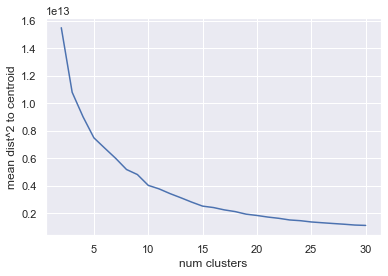

In [59]:
from sklearn.cluster import KMeans
# keys are k (number of clusters), values are mean_d (mean distance
# from each sample to its cluster centroid)
mean_d_dict = dict()
for n_clusters in range(2, 31):
    # fit kmeans
    kmeans = KMeans(n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)    
        
    # compute & store mean distance
    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d
    print(f'{n_clusters} clusters mean_d is: {mean_d:.0f}')

# plot the kmean graph
plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.xlabel('num clusters')
plt.ylabel('mean dist^2 to centroid')

#### BTC Price Data

In [60]:
df_bitcoin = pd.read_csv('coin_Bitcoin.csv',index_col='SNo')

In [61]:
# load data
x_feat_list = df_bitcoin.columns[4:6].values
df_x = copy(df_bitcoin.loc[:, x_feat_list])

df_x.cov()
# scale normalization
df_x_sn = copy(df_x)
for col in df_x_sn.columns:
    df_x_sn[col] = df_x_sn[col] / df_x_sn[col].std()
    
# scale normalization ensures "unit variance" (each feature has variance = 1)
# scale normalization does not ensure resulting features are uncorrelated

2 clusters mean_d is: 15485756258976
3 clusters mean_d is: 10786398622162
4 clusters mean_d is: 9017496062474
5 clusters mean_d is: 7449022480498
6 clusters mean_d is: 6887507081721
7 clusters mean_d is: 6136112716778
8 clusters mean_d is: 5275370203079
9 clusters mean_d is: 4822317621219
10 clusters mean_d is: 4220136615880
11 clusters mean_d is: 3638379685890
12 clusters mean_d is: 3313146140096
13 clusters mean_d is: 3056758652989
14 clusters mean_d is: 2801018378790
15 clusters mean_d is: 2556823655486
16 clusters mean_d is: 2386673624845
17 clusters mean_d is: 2279356019569
18 clusters mean_d is: 2105352005084
19 clusters mean_d is: 2012104102817
20 clusters mean_d is: 1840773331586
21 clusters mean_d is: 1736601979092
22 clusters mean_d is: 1617023658600
23 clusters mean_d is: 1535534121009
24 clusters mean_d is: 1442987370561
25 clusters mean_d is: 1370848817183
26 clusters mean_d is: 1312887850328
27 clusters mean_d is: 1258087660011
28 clusters mean_d is: 1212029754313
29 clus

Text(0, 0.5, 'mean dist^2 to centroid')

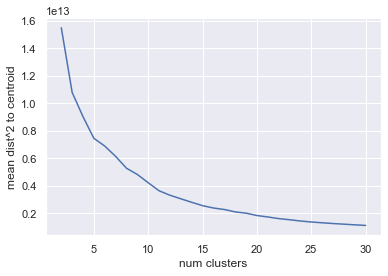

In [62]:
# keys are k (number of clusters), values are mean_d (mean distance
# from each sample to its cluster centroid)
mean_d_dict = dict()
for n_clusters in range(2, 31):
    # fit kmeans
    kmeans = KMeans(n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)    
        
    # compute & store mean distance
    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d
    print(f'{n_clusters} clusters mean_d is: {mean_d:.0f}')

# plot the kmean graph
plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.xlabel('num clusters')
plt.ylabel('mean dist^2 to centroid')

The graphs of k-means clusters vs. mean dist^2 to centroid appear similar, but this does not necessarily indicate a significant relationship between the datasets.

# Discussion

<a id='discussion'></a>

The project did not succeed in being able to predict changes in Bitcoin's price any better than random chance (Cross validated r^2 < 0 for all regressions).  This could be due to two reasons:

1. Our method of analyzing tweet sentiment and aggregating tweet attributes was likely inaccurate.

    - Our sentiment analysis tool gave us scalar values for tweet sentiments, and we used this to create binary sentiment variables.
    
        - This allowed us to easily group tweet attributes, such as likes, across multiple tweets on a single day. However, in simplifying the sentiments in this manner, we may have lost the efficacy of the sentiment analysis tool.
    
    - Another potential issue is that replies to tweets might actually have the opposite sentiment value of the tweet they are attached to. Controversial tweets tend to have lots of replies of people disagreeing with the tweet, so replies on a controversial positive tweet may represent a negative sentiment, and vice-versa with replies to negative tweets.
    
    - **For future analyses, we'd suggest that tweet attributes should be aggregated in a manner that takes into account a tweet's scalar sentiment value, but still enables them to be aggregated across multiple tweets**
    - **For example, a future analysis might multiply the values of each tweets attributes by the tweet's sentiment value, and then aggregate those values. Ex: tweet[sentiment] = .25, tweet[likes] = 4. Positive_likes += (.25 * 4)**

    
2. Our tweet data was incomplete/inaccurate
    - It's possible that our dataset is missing tweets about Bitcoin, and it especially might be incomplete/faulty before for dates before 2019-05-10.
        - As we've mentioned, the graph of total tweets appears highly irregular before this day. This issue should definitely be investigated further before this dataset is used for further analysis.
        - Our cross-validated regressions on 2019-05-10 and onwards likely produce such low r^2 scores (such as -5.51 for regression 6) because of their small sample sizes. There are only about 200 rows of data for this timespan, and cross validating means our regressions are trained on even smaller samples.
    - It's possible that tweets about cryptocurrency in general, which use words such as "crypto" and "blockchain", have a significant effect on Bitcoin's price, but this dataset did not include those tweets.
    - This dataset includes the count of replies and retweets to each BTC related tweet, but does not include the text of the replies or retweets. These are technically BTC related tweets in their own right (even if they don't include BTC or Bitcoin in their text), and it may be necessary to analyze the sentiment of replies and retweets as well in order to ascertain total sentiment.
    - **For future analyses, we'd suggest that Twitter's API be utilized to get recent Twitter data, and that the data be collected in a more complete fashion by including retweet and reply text. However, Twitter likely does not allow unaffiliated people to get thousands of tweets using their API, so perhaps it would be necessary to scrape a represenative sample instead.**

***ML Results:***

- For all but 7 of our 2400 samples, our decision tree regressor did *not* successfully reduce MSE by a significant amount. Therefore, it is not efficacious in determining the effect of tweet sentiment on change in Bitcoin price.

- Unfortunately, because our cross validated linear regressions all yielded negative r^2 scores, the efficacy of the rest of our machine learning models is questionable at best. It is unlikely that our random forest regressor is any more accurate than our linear regressions or decision tree regressor, and this means that our feature importance graph is also probably inaccurate.
    

Despite these results, *we still believe that Bitcoin related tweets likely affect Bitcoin's price,* for the following two reasons:
1. Our r^2 values for our regressions of total_tweets vs. BTC price change were relatively high, with one in particular reaching -0.013.
    - It seems likely that if we could accurately analyze some "hidden" attribute of these tweets, such as their sentiment or a different metric, we could achieve a positive r^2 value for a linear regression.
    - It's also possible that tweets could be used to predict Bitcoin's overall volatility, without trying to predict the direction of price swings.
    
    
2. Anecdotally, it is well known that tweets can significantly impact the prices of other cryptocurrencies. Dogecoin, another cryptocurrency, has had huge spikes in price following tweets by Elon Musk.
    - If the tweet of one large influencer can affect the price of a cryptocurrency, it seems likely that a huge population of relatively uninfluential people could affect the price of a cryptocurrency through their overall tweet sentiment (though this would likely produce smaller, more gradual price swings, especially on a high market cap cryptocurrency such as Bitcoin.

## Takeaway:
Overall, our analysis should not be used to predict the price of Bitcoin or interpret the effect of tweets on Bitcoin's price. Future work in this area should first focus on collecting more "complete" and extensive tweet data, and finding a way to aggregate it while retaining the precision of scalar sentiment values.